In [2]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
import pandas as pd
from Modules.Equation import Equation

In [4]:
labels = ['A', 'B', 'C', 'D']
df, max_data = Helper.load_data(filename='Data/ABCD_DATA.txt', labels=labels)
initial_conditions = np.array([df[label].iloc[0] for label in labels])
t_span = (df['t'].iloc[0], df['t'].iloc[-1])  # Intervalo de tempo para simulações
t_eval = np.array(df['t'])  # Ponto de avaliação dos dados temporais
original = np.array(df[labels]).T  # Dados originais

In [5]:
# Melhor Indivíduo Obtido

coeffs = {
    'A': {
        'A': {'n': 24.705637804071976, 'k': 1.8323915873159544},
        'B': {'n': 4.506407873747729, 'k': 1.335400011186412},
        'D': {'n': 8.954331195942952, 'k': 1.710838606626201},
        'tau': 2.518244501427945
    },
    'B': {
        'C': {'n': 0.7706296719446936, 'k': 1.9154078375104262},
        'D': {'n': 4.492725937914526, 'k': 0.6465974179346934},
        'tau': 2.320262294498478
    },
    'C': {
        'A': {'n': 0.32029197187857167, 'k': 1.9731270152497011},
        'D': {'n': 29.839921387482107, 'k': 0.34795229809615197},
        'tau': 4.875940171168595
    },
    'D': {
        'A': {'n': 28.351651002643422, 'k': 0.9978314520247409},
        'D': {'n': 29.405855661877006, 'k': 0.10047598683716363},
        'tau': 0.7187940258220267
    }
}

In [6]:
equation = Equation(coefficients=coeffs, labels=labels)

def system(t, y, equation):
    vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
    N_A, N_B, N_C, N_D = vals
    
    dA = equation.complex_eqs(vals, 'A', [['-A', '-D'], ['+B', '-D'], ['+A', '-B', '+D']])
    dB = equation.complex_eqs(vals, 'B', [['-C'], ['+D']])
    dC = equation.complex_eqs(vals, 'C', [['+D'], ['-A']])
    dD = equation.complex_eqs(vals, 'D', [['-A'], ['-D']])

    return [dA, dB, dC, dD]

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\MethodsAnalysis\Modules\Equation.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))


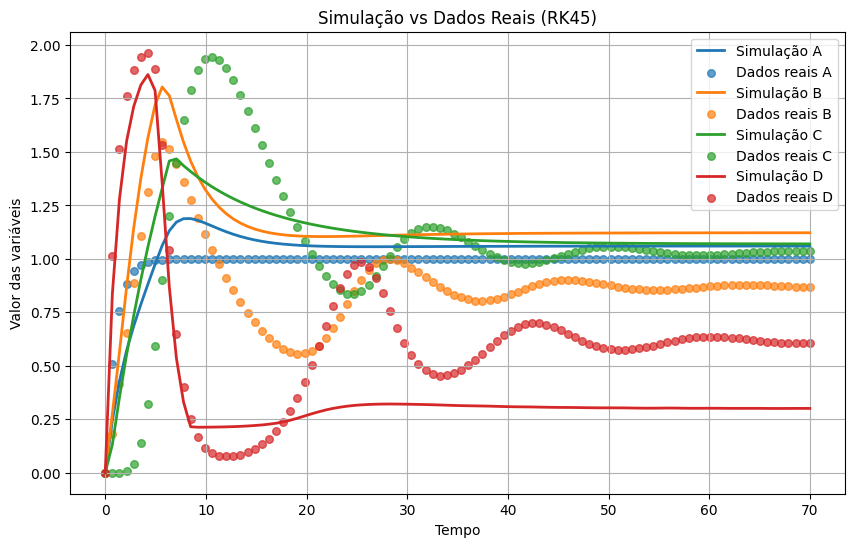

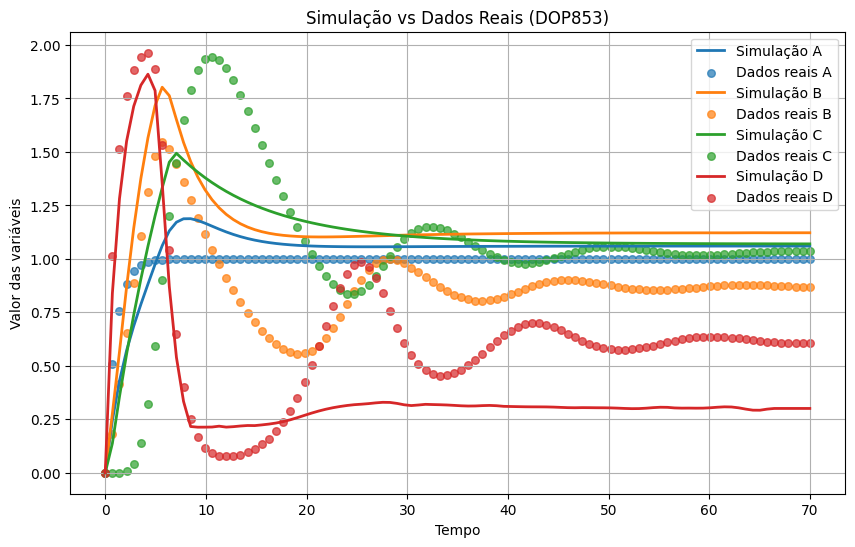

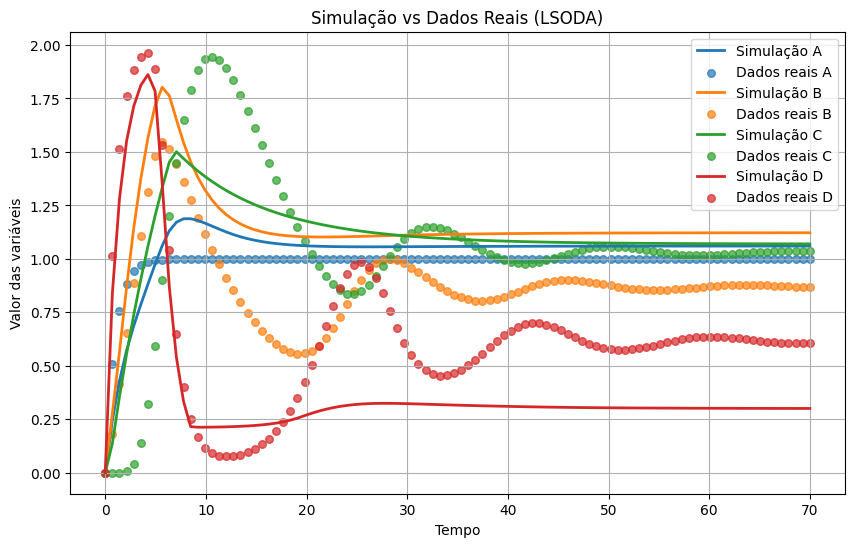

In [8]:
results = {}
methods=['RK45', 'DOP853', 'LSODA']

for method in methods:
    results[method] = solve_ivp(system, t_span, initial_conditions, method=method, t_eval=t_eval, args=(equation,)).y
    
    # Criando a figura e os eixos
    plt.figure(figsize=(10, 6))

    # Plota as curvas dos métodos numéricos
    for i, label in enumerate(labels):
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        # Adiciona os pontos reais ao mesmo gráfico
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.7)

    # Configurações do gráfico
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel("Valor das variáveis")
    plt.title(f"Simulação vs Dados Reais ({method})")
    plt.grid(True)
    plt.show()